In [15]:
# Импорт библиотек
import numpy as np
import math
from scipy.misc import derivative
from scipy.integrate import quad
import matplotlib.pyplot as plt

sqrt = math.sqrt

In [16]:
# Метод конечных разностей
# Вводим ОДУ : p(x), q(x), f(x)
# Вводим граничные условия в виде:
# alpha0 * y(a) + alpha1 * y'(a) = A
# beta0 * y(b) + beta1 * y'(b) = B 

def FiniteDifferenceMethod(alpha0,alpha1,beta0,beta1,A,B,a,b,n, x):
    h = (b-a)/n
    mA = np.zeros((n+1,n+1))
    mB = np.zeros(n+1)
    for i in range(1,n):
        mB[i]= h*h*f(x[i]) 
        mA[i,i] = -(2-q(x[i])*h*h)
        mA[i,i+1] = 1+p(x[i])*h/2
        mA[i,i-1] = 1-p(x[i])*h/2
    mA[0,0]= alpha0*h-alpha1
    mA[0,1]= alpha1
    mA[n,n-1]= -beta1
    mA[n,n]= h*beta0+beta1
    mB[0]=A*h
    mB[n]= B*h
    Yn = seidel(mA,mB,0.0001)
    return Yn
    
#Метод Зейделя-Гаусса
def seidel(A, b, eps):
    n = len(A)
    x = [1.0 for i in range(n)]

    converge = False
    while not converge:
        x_new = np.copy(x)
        for i in range(n):
            s1 = sum(A[i][j] * x_new[j] for j in range(i))
            s2 = sum(A[i][j] * x[j] for j in range(i + 1, n))
            x_new[i] = (b[i] - s1 - s2) / A[i][i]

        converge = sqrt(sum((x_new[i] - x[i]) ** 2 for i in range(n))) <= eps
        x = x_new

    return x

#Служебная функция

def Output(arrX, arrY, corArrY):
    result = "%8s\t%8s\t%12s\t%10s\n" % ('X','Y','Точное решение','Погрешность')
    for i in range(len(arrX)):
        result += "%7f\t%7f\t%7f\t%7f\n" % (arrX[i],arrY[i],corArrY[i],corArrY[i]-arrY[i])
    print(result)


#Описание ОДУ
#y''+(2/x)y'-y=0
def p(x):
    return 0

def q(x):
    return -2*(1+(np.tan(x))**2)

def f(x):
    return 0.0

#Точное решение
def y_correct(x):
    return -np.tan(x)

if __name__ == "__main__":
    #Исходные данные граничных условий
    alpha0 =  1
    alpha1 = 0
    beta0 = 1
    beta1 = 0
    A = 0
    B =  -math.sqrt(3) / 3
    a = 0
    b = math.pi / 6

    n = 10

    x=[a+i*((b-a)/n) for i in range(n+1)]
    Y_Correct = [y_correct(x[i]) for i in range(len(x))]



In [17]:
print("Краевая задача:")
print("y''-2*(1+(tg(x))^2)y=0")
print("y(0)=0; y(pi/6)=-√3/3\n")
print("Точное решение:")
print("y(x)=-tg(x)\n")
print("Метод конечных разностей:")
yMKR = FiniteDifferenceMethod(alpha0,alpha1,beta0,beta1,A,B,a,b,n,x)
Output(x, yMKR, Y_Correct)


Краевая задача:
y''-2*(1+(tg(x))^2)y=0
y(0)=0; y(pi/6)=-√3/3

Точное решение:
y(x)=-tg(x)

Метод конечных разностей:
       X	       Y	Точное решение	Погрешность
0.000000	0.000000	-0.000000	-0.000000
0.052360	-0.052271	-0.052408	-0.000137
0.104720	-0.104860	-0.105104	-0.000245
0.157080	-0.158068	-0.158384	-0.000316
0.209440	-0.212208	-0.212557	-0.000349
0.261799	-0.267607	-0.267949	-0.000342
0.314159	-0.324618	-0.324920	-0.000302
0.366519	-0.383628	-0.383864	-0.000236
0.418879	-0.445072	-0.445229	-0.000156
0.471239	-0.509452	-0.509525	-0.000073
0.523599	-0.577350	-0.577350	0.000000



In [18]:
#"Метод конечных разностей:
yMKR = FiniteDifferenceMethod(alpha0,alpha1,beta0,beta1,A,B,a,b,n,x)
Output(x, yMKR, Y_Correct)

       X	       Y	Точное решение	Погрешность
0.000000	0.000000	-0.000000	-0.000000
0.052360	-0.052271	-0.052408	-0.000137
0.104720	-0.104860	-0.105104	-0.000245
0.157080	-0.158068	-0.158384	-0.000316
0.209440	-0.212208	-0.212557	-0.000349
0.261799	-0.267607	-0.267949	-0.000342
0.314159	-0.324618	-0.324920	-0.000302
0.366519	-0.383628	-0.383864	-0.000236
0.418879	-0.445072	-0.445229	-0.000156
0.471239	-0.509452	-0.509525	-0.000073
0.523599	-0.577350	-0.577350	0.000000



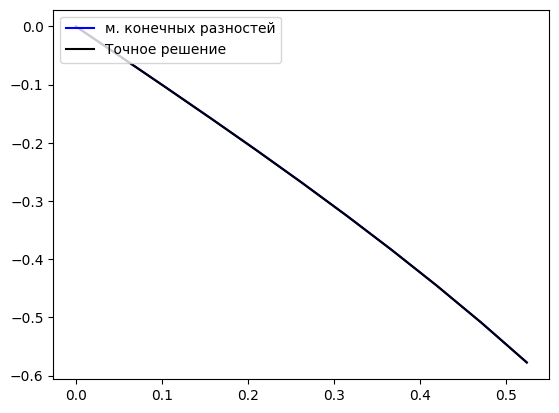

In [19]:
 #Графики
fig, ax = plt.subplots()
ax.plot(x, yMKR, color='blue', label="м. конечных разностей")
ax.plot(x, Y_Correct, color='black', label="Точное решение")
ax.legend(loc='upper left')
plt.show()